In [1]:
import intake
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]

In [2]:
from easygems import healpix as egh

import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore", category=FutureWarning) # don't warn us about future package conflicts

## ICON
### atmosphere-only simulation at 2.5 km resolution

In [3]:
pd.DataFrame(cat["icon_d3hp003"].describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT1H, PT3H, PT6H, P1D]",P1D
1,time_method,time subsetting method,str,"[mean, inst]",mean
2,zoom,zoom resolution of the dataset,int,"[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",0


In [6]:
ds_icon = cat["icon_d3hp003"](zoom=7).to_dask() 
ds_icon

<xarray.Dataset> Size: 98GB
Dimensions:        (time: 425, cell: 196608, crs: 1, pressure: 30,
                    soil_level: 5, pressure_rva: 3)
Coordinates:
  * crs            (crs) float32 4B nan
  * pressure       (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva   (pressure_rva) int64 24B 16 18 23
  * soil_level     (soil_level) int64 40B 0 0 0 2 6
  * time           (time) datetime64[ns] 3kB 2020-01-02 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/58)
    clivi          (time, cell) float32 334MB ...
    clt            (time, cell) float32 334MB ...
    clwvi          (time, cell) float32 334MB ...
    egpvi          (time, cell) float32 334MB ...
    einvi          (time, cell) float32 334MB ...
    ekhvi          (time, cell) float32 334MB ...
    ...             ...
    ua             (time, pressure, cell) float32 10GB ...
    uas            (time, cell) float32 334MB ...
    va             (time, pressure, cell) float32 10GB ...
    vas            (time, cell) float32 334MB ...
    wa             (time, pressure, cell) float32 10GB ...
    zg             (time, pressure, cell) float32 10GB ...

In [7]:
mean_precip_icon = ds_icon["pr"].sel(time=slice("2020-01-01", "2021-02-28")).mean(dim="time") * 86400
mean_precip_icon

<xarray.DataArray 'pr' (cell: 196608)> Size: 786kB
array([1.6048514, 1.4851915, 1.5761831, ..., 5.4638176, 6.021318 ,
       5.748378 ], shape=(196608,), dtype=float32)
Dimensions without coordinates: cell

## ERA5

In [55]:
pd.DataFrame(cat["ERA5"].describe()["user_parameters"])


,name,description,type,allowed,default
0,zoom,zoom resolution of the dataset,int,"[8, 7, 6, 5, 4, 3, 2, 1, 0]",7


In [30]:
ds_era5 = cat["ERA5"](zoom=7).to_dask() 
ds_era5.tp

<xarray.DataArray 'tp' (time: 1008, cell: 196608)> Size: 793MB
dask.array<open_dataset-tp, shape=(1008, 196608), dtype=float32, chunksize=(24, 16384), chunktype=numpy.ndarray>
Coordinates:
  * cell     (cell) float32 786kB 0.0 1.0 2.0 ... 1.966e+05 1.966e+05 1.966e+05
    crs      float32 4B ...
    lat      (cell) float32 786kB dask.array<chunksize=(196608,), meta=np.ndarray>
    lon      (cell) float32 786kB dask.array<chunksize=(196608,), meta=np.ndarray>
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
Attributes:
    grid_mapping:   crs
    levtype:        surface
    long_name:      Total precipitation
    standard_name:  
    units:          m

In [60]:
mean_precip_era5 = ds_era5["tp"].sel(time=slice("2020-01-01", "2021-02-28")).mean(dim="time") * 100
mean_precip_era5

<xarray.DataArray 'tp' (cell: 196608)> Size: 786kB
dask.array<mul, shape=(196608,), dtype=float32, chunksize=(16384,), chunktype=numpy.ndarray>
Coordinates:
  * cell     (cell) float32 786kB 0.0 1.0 2.0 ... 1.966e+05 1.966e+05 1.966e+05
    crs      float32 4B ...
    lat      (cell) float32 786kB dask.array<chunksize=(196608,), meta=np.ndarray>
    lon      (cell) float32 786kB dask.array<chunksize=(196608,), meta=np.ndarray>

## IR_IMERG

In [ ]:
pd.DataFrame(cat["ERA5"].describe()["user_parameters"])


In [ ]:
ds_era5 = cat["ERA5"](zoom=7).to_dask() 
ds_era5.tp

In [ ]:
mean_precip_era5 = ds_era5["tp"].sel(time=slice("2020-01-01", "2021-02-28")).mean(dim="time") * 86400
mean_precip_era5

## plot

<Figure size 640x480 with 0 Axes>

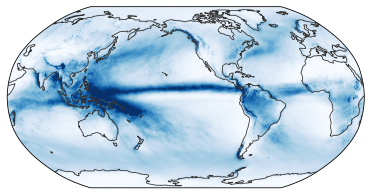

In [8]:
egh.healpix_show(mean_precip_icon, cmap="Blues", dpi=72,vmin=0,vmax=10);


In [ ]:
mean_precip = ds["pr"].sel(time=slice("2020-01-01", "2020-12-31")).mean(dim="time") * 86400
